# MSc. Dissertation - DataScience By Robert Solomon
## BACKGROUND:   
### Analysis of Remote Work Impact on Employee Well-Being (Secondary Dataset)
This notebook focuses on cleaning, processing, and preparing the secondary dataset obtained from Kaggle that explores the effects of remote work on employee mental health, work-life balance, and productivity etc. as part of MSc. Dissertation. The dataset includes various factors such as work location (remote/hybrid/on-site), hours worked per week, stress levels, mental health conditions, and access to employer-provided support resources.

To ensure the data is structured for statistical analysis, the following data preparation steps were performed:

- Handling missing values by imputing categorical and numerical data appropriately.
- Encoding categorical variables (e.g., work location, mental health condition, and gender) using label encoding and one-hot encoding.
- Standardizing numerical values for consistency across features such as work-life balance ratings and stress levels.
- Detecting outliers for predictive modelling, however table wasn't removed because it caused a massive data loss.
- Feature engineering to create new insights, such as a Work Stress Score, to enhance statistical analysis.
- This cleaned dataset will later be used for correlation analysis, descriptive analysis, anova tests ,regression modeling, and comparative studies with primary survey data collected from remote workers. The insights derived from this analysis will contribute to a deeper understanding of how remote work impacts employee satisfaction, social isolation, and overall productivity.

In [2]:
# Importing necessary libraries here below:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Loading in the secondary data (Kaggle)

In [4]:
wfh_mentalHealth_data = pd.read_csv('../Secondary_Research/SR_Dataset/Remote_Work_on_Mental_Health.csv')

In [5]:
# Display the first few rows to inspect the data
wfh_mentalHealth_data

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [6]:
# Checking number of rows, columns in the data.

print(wfh_mentalHealth_data.shape)

(5000, 20)


In [7]:
# Describing (summarize) all variables.

wfh_mentalHealth_data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


## 1.1 Checking the data types and missing values:

In [9]:
# Getting dataset info
wfh_mentalHealth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [10]:
# Checking for missing values in each column
wfh_mentalHealth_data.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

## 2. Handling Missing Data

### The dataset after observation and partial investigation indicates some missing values, particularly in:

- Mental_Health_Condition
- Physical_Activity

We can handle missing values as follows:

### 2.1 Drop Rows with Too Many Missing Values
Given that some rows have excessive missing values (e.g., 3 or more NaNs), they might not be useful for my analysis so I will drop them.

In [13]:
# Dropping rows where there's missing values in 'Mental_Health_Condition' column and 'Physical_Activity' column:
wfh_mentalHealth_data.dropna(subset=['Mental_Health_Condition'], inplace=True)
wfh_mentalHealth_data.dropna(subset=['Physical_Activity'], inplace=True)  

In [14]:
# Re-checking again for missing values after dropping rows
wfh_mentalHealth_data.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [15]:
# Re-checking number of rows, columns in the data post dropping of rows.
print(wfh_mentalHealth_data.shape)

(2577, 20)


In [16]:
# Display the first few rows to inspect the data again for reassurance
wfh_mentalHealth_data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe


# 3. Converting Categorical Variables
To ensure statistical compatibility, we must encode categorical data.

### 3.1 Gender (Categorical)
- This column contains "Male", "Female".
- Since gender is categorical but not ordinal, I will use Label Encoding for simplicity and focus on gender that makes sense, 'Male' and 'Female'.

In [18]:
wfh_mentalHealth_data['Gender'] = wfh_mentalHealth_data['Gender'].map({'Male': 0, 'Female': 1})

In [19]:
# Checking again for missing values after dropping rows
wfh_mentalHealth_data.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                               1272
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition                 0
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                       0
Sleep_Quality                           0
Region                                  0
dtype: int64

### 3.2 Mental_Health_Condition (Categorical)
- This column contains "Anxiety", "Depression", "None", etc.
- Since this is nominal (not ordered), we can use One-Hot Encoding.



One-Hot Encoding Mental Health Condition:

In [21]:
wfh_mentalHealth_data = pd.get_dummies(wfh_mentalHealth_data, columns=['Mental_Health_Condition'], prefix='MHC', drop_first=True)

### 3.3 Converting Binary Categories to 0/1
- For Yes/No columns like "Access_to_Mental_Health_Resources", I'm converting them to 0s and 1s.

In [23]:
wfh_mentalHealth_data['Access_to_Mental_Health_Resources'] = wfh_mentalHealth_data['Access_to_Mental_Health_Resources'].map({'Yes': 1, 'No': 0})

In [24]:
wfh_mentalHealth_data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,MHC_Burnout,MHC_Depression
0,EMP0001,32,NaN,HR,Healthcare,13,Hybrid,47,7,2,...,0,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,False,True
1,EMP0002,40,1.0,Data Scientist,IT,3,Remote,52,4,1,...,0,Increase,3,Satisfied,2,Weekly,Good,Asia,False,False
6,EMP0007,31,NaN,Sales,IT,24,Remote,51,7,3,...,1,Decrease,5,Neutral,3,Daily,Poor,Asia,False,False
9,EMP0010,30,1.0,HR,IT,28,Hybrid,57,6,1,...,1,Decrease,2,Neutral,1,Weekly,Poor,North America,False,True
12,EMP0013,40,1.0,Marketing,Consulting,1,Remote,21,7,2,...,1,Decrease,2,Neutral,1,Weekly,Good,Europe,False,True


### 3.4 Encoding Multi-Class Categories

For categorical columns like Job_Role, Industry, and Region, we use One-Hot Encoding.

In [26]:
wfh_mentalHealth_data = pd.get_dummies(wfh_mentalHealth_data, columns=['Job_Role', 'Industry', 'Region'], drop_first=True)

For ordinal categories like Work_Location, we map them to numerical values:

In [28]:
wfh_mentalHealth_data['Work_Location'] = wfh_mentalHealth_data['Work_Location'].map({'Remote': 1, 'Hybrid': 2, 'Onsite': 3})

For Stress Level and Satisfaction with Remote Work, we assign numerical rankings:

In [30]:
wfh_mentalHealth_data['Stress_Level'] = wfh_mentalHealth_data['Stress_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
wfh_mentalHealth_data['Satisfaction_with_Remote_Work'] = wfh_mentalHealth_data['Satisfaction_with_Remote_Work'].map({'Unsatisfied': 1, 'Neutral': 2, 'Satisfied': 3})

In [31]:
# Validating number of columns ,post encoding above:
print(wfh_mentalHealth_data.shape)

(2577, 35)


In [32]:
wfh_mentalHealth_data.head()

,Employee_ID,Age,Gender,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,...,Industry_Finance,Industry_Healthcare,Industry_IT,Industry_Manufacturing,Industry_Retail,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,EMP0001,32,NaN,13,2,47,7,2,2,0,...,False,True,False,False,False,False,True,False,False,False
1,EMP0002,40,1.0,3,1,52,4,1,2,0,...,False,False,True,False,False,True,False,False,False,False
6,EMP0007,31,NaN,24,1,51,7,3,1,1,...,False,False,True,False,False,True,False,False,False,False
9,EMP0010,30,1.0,28,2,57,6,1,1,1,...,False,False,True,False,False,False,False,True,False,False
12,EMP0013,40,1.0,1,1,21,7,2,3,1,...,False,False,False,False,False,False,True,False,False,False


In [33]:
# Dropping rows where there's missing values, in this case, 'Gender' column:
wfh_mentalHealth_data.dropna(subset=['Gender'], inplace=True)

In [34]:
# Re-checking again for missing values
wfh_mentalHealth_data.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
MHC_Burnout                          0
MHC_Depression                       0
Job_Role_Designer                    0
Job_Role_HR                          0
Job_Role_Marketing                   0
Job_Role_Project Manager             0
Job_Role_Sales                       0
Job_Role_Software Engineer           0
Industry_Education                   0
Industry_Finance         

Writing to excel file after all the encoding was carried out for further validation:

In [36]:
wfh_mentalHealth_data.to_csv("../Secondary_Research/SR_Dataset/post_Encoded_Remote_Work_on_Mental_Health.csv", index=False)

# 4. Standardizing Numerical Data
Here we are ensuring that numerical columns are in the proper format.

In [38]:
# Converting necessary columns to numeric
numeric_cols = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 
                'Work_Life_Balance_Rating', 'Stress_Level', 'Social_Isolation_Rating']


# For loop to iterate through the 'numeric_cols' array object of my chosen columns subject to proper formatting: 
for col in numeric_cols:
    wfh_mentalHealth_data[col] = pd.to_numeric(wfh_mentalHealth_data[col], errors='coerce')

In [39]:
wfh_mentalHealth_data

,Employee_ID,Age,Gender,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,...,Industry_Finance,Industry_Healthcare,Industry_IT,Industry_Manufacturing,Industry_Retail,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
1,EMP0002,40,1.0,3,1,52,4,1,2,0,...,False,False,True,False,False,True,False,False,False,False
9,EMP0010,30,1.0,28,2,57,6,1,1,1,...,False,False,True,False,False,False,False,True,False,False
12,EMP0013,40,1.0,1,1,21,7,2,3,1,...,False,False,False,False,False,False,True,False,False,False
15,EMP0016,56,1.0,13,1,44,11,4,1,0,...,False,True,False,False,False,False,False,False,False,False
19,EMP0020,59,0.0,13,1,59,4,3,2,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,EMP4980,26,0.0,26,2,34,10,5,2,1,...,False,False,False,False,True,False,False,False,False,False
4981,EMP4982,57,0.0,17,3,58,15,2,2,1,...,False,False,False,False,False,False,False,False,True,False
4991,EMP4992,60,1.0,9,2,57,4,2,1,1,...,False,False,True,False,False,False,False,False,True,False
4995,EMP4996,32,0.0,4,3,24,2,5,3,1,...,False,False,False,False,False,True,False,False,False,False


In [40]:
# Re-checking again for missing values
wfh_mentalHealth_data.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
MHC_Burnout                          0
MHC_Depression                       0
Job_Role_Designer                    0
Job_Role_HR                          0
Job_Role_Marketing                   0
Job_Role_Project Manager             0
Job_Role_Sales                       0
Job_Role_Software Engineer           0
Industry_Education                   0
Industry_Finance         

In [41]:
wfh_mentalHealth_data

,Employee_ID,Age,Gender,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,...,Industry_Finance,Industry_Healthcare,Industry_IT,Industry_Manufacturing,Industry_Retail,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
1,EMP0002,40,1.0,3,1,52,4,1,2,0,...,False,False,True,False,False,True,False,False,False,False
9,EMP0010,30,1.0,28,2,57,6,1,1,1,...,False,False,True,False,False,False,False,True,False,False
12,EMP0013,40,1.0,1,1,21,7,2,3,1,...,False,False,False,False,False,False,True,False,False,False
15,EMP0016,56,1.0,13,1,44,11,4,1,0,...,False,True,False,False,False,False,False,False,False,False
19,EMP0020,59,0.0,13,1,59,4,3,2,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,EMP4980,26,0.0,26,2,34,10,5,2,1,...,False,False,False,False,True,False,False,False,False,False
4981,EMP4982,57,0.0,17,3,58,15,2,2,1,...,False,False,False,False,False,False,False,False,True,False
4991,EMP4992,60,1.0,9,2,57,4,2,1,1,...,False,False,True,False,False,False,False,False,True,False
4995,EMP4996,32,0.0,4,3,24,2,5,3,1,...,False,False,False,False,False,True,False,False,False,False


# 5. Handling Outliers
Checking for outliers using the Interquartile Range (IQR) Method.

In [43]:
# Defining IQR range
Q1 = wfh_mentalHealth_data[numeric_cols].quantile(0.25)
Q3 = wfh_mentalHealth_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

#Printing output:
# IQR

Q1

Age                         30.0
Years_of_Experience          9.0
Hours_Worked_Per_Week       29.0
Work_Life_Balance_Rating     2.0
Stress_Level                 1.0
Social_Isolation_Rating      2.0
Name: 0.25, dtype: float64

In [44]:
Q3

Age                         50.0
Years_of_Experience         26.0
Hours_Worked_Per_Week       50.0
Work_Life_Balance_Rating     4.0
Stress_Level                 3.0
Social_Isolation_Rating      4.0
Name: 0.75, dtype: float64

In [45]:
IQR

Age                         20.0
Years_of_Experience         17.0
Hours_Worked_Per_Week       21.0
Work_Life_Balance_Rating     2.0
Stress_Level                 2.0
Social_Isolation_Rating      2.0
dtype: float64

In [46]:
# Re-checking again for missing values
# wfh_mentalHealth_data.isnull().sum()

In [47]:
# Defining any outlier boundaries
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR

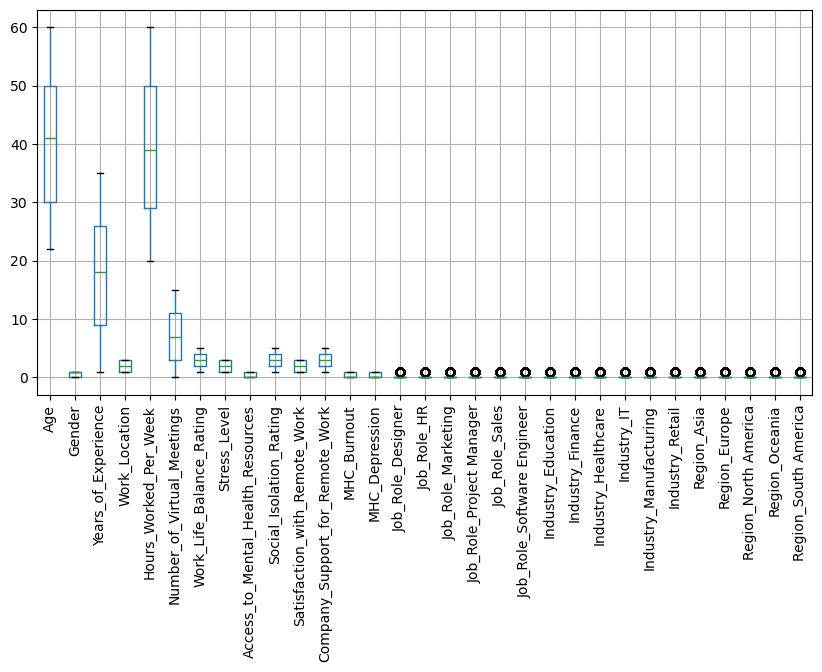

In [48]:
# Printing a boxplot showing the outliers
wfh_mentalHealth_data.boxplot(rot=90, figsize=(10,5))
plt.show()

# 6. Feature Engineering
This is not particularly necessary but I've applied feature engineering to predict outcomes based on certain factors (variables) in the dataset.

In [50]:
# Creating a 'Work_Stress_Score' based on multiple factors (Hours worked per week, number of virtual meetings and work life balance rating) to possibly enhance statistical analysis.
wfh_mentalHealth_data['Work_Stress_Score'] = wfh_mentalHealth_data['Hours_Worked_Per_Week'] + wfh_mentalHealth_data['Number_of_Virtual_Meetings'] - wfh_mentalHealth_data['Work_Life_Balance_Rating']

In [51]:
# Displaying snippet of cleaned dataset for reassurance: 
wfh_mentalHealth_data

,Employee_ID,Age,Gender,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,...,Industry_Healthcare,Industry_IT,Industry_Manufacturing,Industry_Retail,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Work_Stress_Score
1,EMP0002,40,1.0,3,1,52,4,1,2,0,...,False,True,False,False,True,False,False,False,False,55
9,EMP0010,30,1.0,28,2,57,6,1,1,1,...,False,True,False,False,False,False,True,False,False,62
12,EMP0013,40,1.0,1,1,21,7,2,3,1,...,False,False,False,False,False,True,False,False,False,26
15,EMP0016,56,1.0,13,1,44,11,4,1,0,...,True,False,False,False,False,False,False,False,False,51
19,EMP0020,59,0.0,13,1,59,4,3,2,0,...,False,False,False,False,False,False,False,False,True,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,EMP4980,26,0.0,26,2,34,10,5,2,1,...,False,False,False,True,False,False,False,False,False,39
4981,EMP4982,57,0.0,17,3,58,15,2,2,1,...,False,False,False,False,False,False,False,True,False,71
4991,EMP4992,60,1.0,9,2,57,4,2,1,1,...,False,True,False,False,False,False,False,True,False,59
4995,EMP4996,32,0.0,4,3,24,2,5,3,1,...,False,False,False,False,True,False,False,False,False,21


In [52]:
# Re-checking again for missing values
wfh_mentalHealth_data.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
MHC_Burnout                          0
MHC_Depression                       0
Job_Role_Designer                    0
Job_Role_HR                          0
Job_Role_Marketing                   0
Job_Role_Project Manager             0
Job_Role_Sales                       0
Job_Role_Software Engineer           0
Industry_Education                   0
Industry_Finance         

# 7.  Saving Cleaned Dataset
Saving pre-processed dataset, which is ready to be used for analysis:

In [54]:
wfh_mentalHealth_data.to_csv("../Secondary_Research/SR_Dataset/cleaned_Remote_Work_on_Mental_Health.csv", index=False)